In [3]:
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

'C:\\spark\\spark-3.3.1-bin-hadoop3'

In [4]:
import random
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
conf = pyspark.SparkConf().setAppName('SparkApp').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)


In [17]:
df = spark.read.csv("amazon.csv", header=True)
type(df)

pyspark.sql.dataframe.DataFrame

In [7]:
from pyspark.sql.functions import mean
news = df[df["User Rating"] > 4.7]
news.select(mean("Price")).show()

+-----------------+
|       avg(Price)|
+-----------------+
|10.69832402234637|
+-----------------+



In [64]:
import matplotlib.pyplot
new = df.toPandas()
new['Reviews'] = new['Reviews'].astype(float)
new['Price'] = new['Price'].astype(float)
new['Year'] = new['Year'].astype(float)
new['User Rating'] = new['User Rating'].astype(float)
# sns.boxplot(
#     data=new, x="Reviews", y="Year",
#     notch=True, showcaps=False,
#     flierprops={"marker": "x"},
#     boxprops={"facecolor": (.4, .6, .8, .5)},
#     medianprops={"color": "coral"},
# )


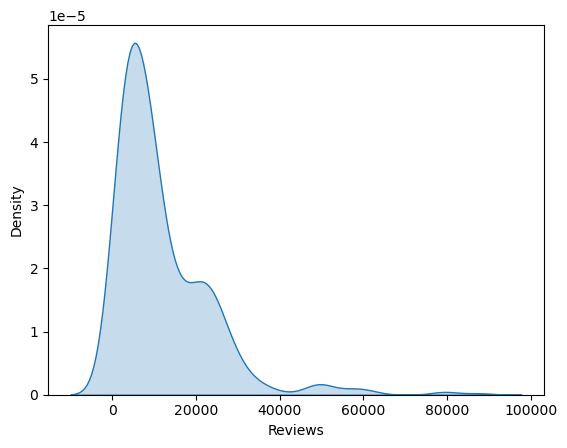

In [57]:
import seaborn as sns 
snsplot = sns.kdeplot(new['Reviews'], shade=True)
fig = snsplot.get_figure()

<AxesSubplot:>

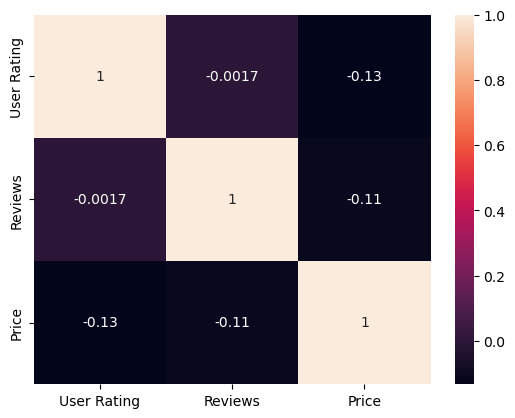

In [66]:
import pandas as pd
numeric_col = ['User Rating','Reviews','Price']
corr_matrix = new.loc[:,numeric_col].corr()
sns.heatmap(corr_matrix, annot=True)

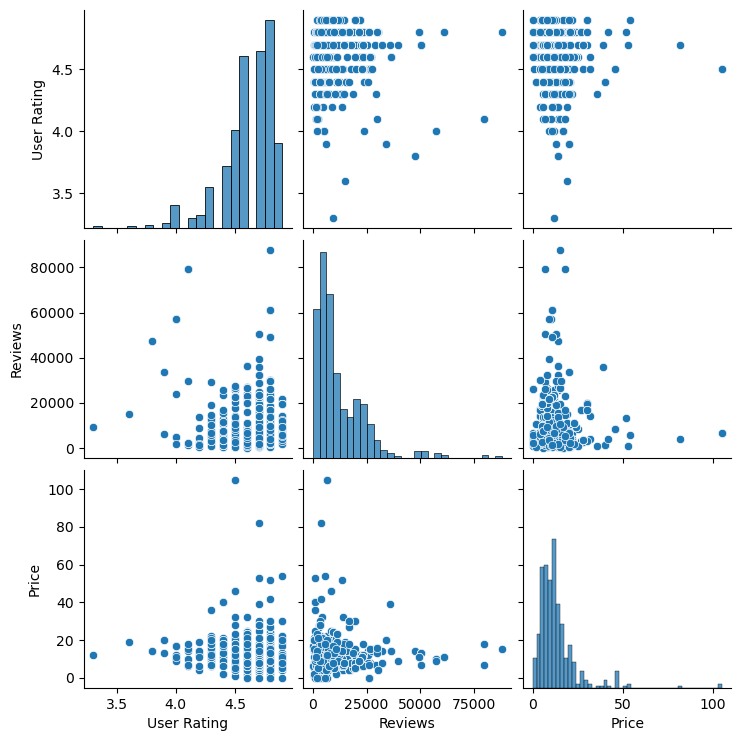

In [69]:
numeric_col = ['User Rating','Reviews','Price']
new_matrix = new.loc[:,numeric_col]
sns.pairplot(new_matrix)